In [15]:
import requests
import pandas as pd
import yfinance as yf

# 📊 1. Exchange Rates (USD to NGN, EUR, GBP)
url = "https://api.frankfurter.app/2024-05-25..2024-06-25?from=USD&to=NGN,EUR,GBP"
res = requests.get(url)
data = res.json()
fx_df = pd.DataFrame(data['rates']).T
fx_df.index = pd.to_datetime(fx_df.index)
fx_df.columns = [f'USD_{col}' for col in fx_df.columns]

# 🟡 2. Gold Prices (GC=F)
gold = yf.download("GC=F", start="2024-05-25", end="2024-06-26")
gold.columns = ['_'.join(col).strip() for col in gold.columns.values]  # Flatten MultiIndex
gold = gold[['Close_GC=F']].rename(columns={'Close_GC=F': 'Gold_Price_USD'})

# 🛢️ 3. Oil Prices (BZ=F)
oil = yf.download("BZ=F", start="2024-05-25", end="2024-06-26")
oil.columns = ['_'.join(col).strip() for col in oil.columns.values]  # Flatten MultiIndex
oil = oil[['Close_BZ=F']].rename(columns={'Close_BZ=F': 'Brent_Oil_USD'})

# 🔗 Merge all data
df = fx_df.merge(gold, left_index=True, right_index=True, how='outer')
df = df.merge(oil, left_index=True, right_index=True, how='outer')
df = df.sort_index()

# 💾 Save to CSV
df.to_csv("historical_data.csv")

# ✅ Display last 5 rows
print(df.tail())


/var/folders/9c/9ls9b8xn5pj42_pq4p3qdkzw0000gn/T/ipykernel_56847/1199024549.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  gold = yf.download("GC=F", start="2024-05-25", end="2024-06-26")
[*********************100%***********************]  1 of 1 completed
/var/folders/9c/9ls9b8xn5pj42_pq4p3qdkzw0000gn/T/ipykernel_56847/1199024549.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  oil = yf.download("BZ=F", start="2024-05-25", end="2024-06-26")
[*********************100%***********************]  1 of 1 completed

            USD_EUR  USD_GBP  Gold_Price_USD  Brent_Oil_USD
2024-06-19  0.93032  0.78570             NaN            NaN
2024-06-20  0.93292  0.78844     2353.800049      85.709999
2024-06-21  0.93563  0.79090     2316.399902      85.239998
2024-06-24  0.93197  0.78966     2330.000000      86.010002
2024-06-25  0.93336  0.78836     2316.600098      85.010002


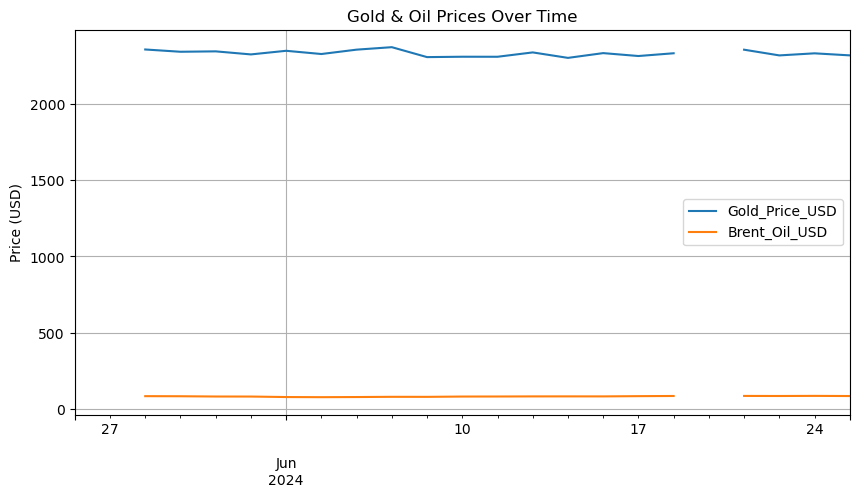

In [16]:
import matplotlib.pyplot as plt

df[['Gold_Price_USD', 'Brent_Oil_USD']].plot(figsize=(10, 5), title='Gold & Oil Prices Over Time')
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


In [17]:
df_pct = df.pct_change() * 100
print(df_pct.tail())


             USD_EUR   USD_GBP  Gold_Price_USD  Brent_Oil_USD
2024-06-19 -0.316093 -0.416989        0.000000       0.000000
2024-06-20  0.279474  0.348734        1.004126       0.445327
2024-06-21  0.290486  0.312009       -1.588926      -0.548362
2024-06-24 -0.391180 -0.156783        0.587122       0.903337
2024-06-25  0.149146 -0.164628       -0.575103      -1.162655


/var/folders/9c/9ls9b8xn5pj42_pq4p3qdkzw0000gn/T/ipykernel_56847/4049089775.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  df_pct = df.pct_change() * 100


In [18]:
print(df.corr())


                 USD_EUR   USD_GBP  Gold_Price_USD  Brent_Oil_USD
USD_EUR         1.000000  0.795663       -0.359829       0.687448
USD_GBP         0.795663  1.000000       -0.185103       0.654210
Gold_Price_USD -0.359829 -0.185103        1.000000      -0.129624
Brent_Oil_USD   0.687448  0.654210       -0.129624       1.000000
